In [31]:
import pandas as pd
import numpy as np

In [32]:
#carregar os dados do arquivo txt
data = pd.read_csv('salv_708_2004_2021.txt', delimiter='\t', header=None)

In [33]:
# Renomear as colunas
data.columns = ['dt', 'hr', 'alt']

In [34]:
#converter as colunas de data e hora para um projeto datetime
from datetime import datetime 

# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['dt_hr'] = pd.to_datetime(data['dt'] + ' ' + data['hr'], format='%d/%m/%Y %H:%M')

In [35]:
# Converter a coluna 'dt_hrs' para o índice do DataFrame, se ainda não estiver
data.set_index('dt_hr', inplace=True)

In [36]:
data

,dt,hr,alt
dt_hr,,,
2004-10-15 05:00:00,15/10/2004,05:00,8.447
2004-10-15 06:00:00,15/10/2004,06:00,8.090
2004-10-15 07:00:00,15/10/2004,07:00,7.505
2004-10-15 08:00:00,15/10/2004,08:00,6.864
2004-10-15 09:00:00,15/10/2004,09:00,6.313
...,...,...,...
2021-12-31 19:00:00,31/12/2021,19:00,6.431
2021-12-31 20:00:00,31/12/2021,20:00,6.235
2021-12-31 21:00:00,31/12/2021,21:00,6.280


In [37]:
print(data.columns)

Index(['dt', 'hr', 'alt'], dtype='object')


In [38]:
# Calcula a média da coluna 'mare'
media_mare = data['alt'].mean()

# Subtrai a média de todos os valores na coluna 'mare' e adiciona como uma nova coluna
data['alt_zero'] = data['alt'] - media_mare

# Exibe os primeiros valores do DataFrame com as colunas originais e a 'mare' centralizada
print(data[['dt', 'hr', 'alt', 'alt_zero',]])

                             dt     hr    alt  alt_zero
dt_hr                                                  
2004-10-15 05:00:00  15/10/2004  05:00  8.447  1.161622
2004-10-15 06:00:00  15/10/2004  06:00  8.090  0.804622
2004-10-15 07:00:00  15/10/2004  07:00  7.505  0.219622
2004-10-15 08:00:00  15/10/2004  08:00  6.864 -0.421378
2004-10-15 09:00:00  15/10/2004  09:00  6.313 -0.972378
...                         ...    ...    ...       ...
2021-12-31 19:00:00  31/12/2021  19:00  6.431 -0.854378
2021-12-31 20:00:00  31/12/2021  20:00  6.235 -1.050378
2021-12-31 21:00:00  31/12/2021  21:00  6.280 -1.005378
2021-12-31 22:00:00  31/12/2021  22:00  6.587 -0.698378
2021-12-31 23:00:00  31/12/2021  23:00  7.047 -0.238378

[150883 rows x 4 columns]


In [39]:
# Concatenando as colunas 'dt' e 'hr' e convertendo para o formato datetime
data['data_hora'] = pd.to_datetime(data['dt'] + ' ' + data['hr'])
# Exibindo o DataFrame atualizado
print(data)

                             dt     hr    alt  alt_zero           data_hora
dt_hr                                                                      
2004-10-15 05:00:00  15/10/2004  05:00  8.447  1.161622 2004-10-15 05:00:00
2004-10-15 06:00:00  15/10/2004  06:00  8.090  0.804622 2004-10-15 06:00:00
2004-10-15 07:00:00  15/10/2004  07:00  7.505  0.219622 2004-10-15 07:00:00
2004-10-15 08:00:00  15/10/2004  08:00  6.864 -0.421378 2004-10-15 08:00:00
2004-10-15 09:00:00  15/10/2004  09:00  6.313 -0.972378 2004-10-15 09:00:00
...                         ...    ...    ...       ...                 ...
2021-12-31 19:00:00  31/12/2021  19:00  6.431 -0.854378 2021-12-31 19:00:00
2021-12-31 20:00:00  31/12/2021  20:00  6.235 -1.050378 2021-12-31 20:00:00
2021-12-31 21:00:00  31/12/2021  21:00  6.280 -1.005378 2021-12-31 21:00:00
2021-12-31 22:00:00  31/12/2021  22:00  6.587 -0.698378 2021-12-31 22:00:00
2021-12-31 23:00:00  31/12/2021  23:00  7.047 -0.238378 2021-12-31 23:00:00

[150883 row

C:\Users\labdi\AppData\Local\Temp\ipykernel_3312\3721535274.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['data_hora'] = pd.to_datetime(data['dt'] + ' ' + data['hr'])


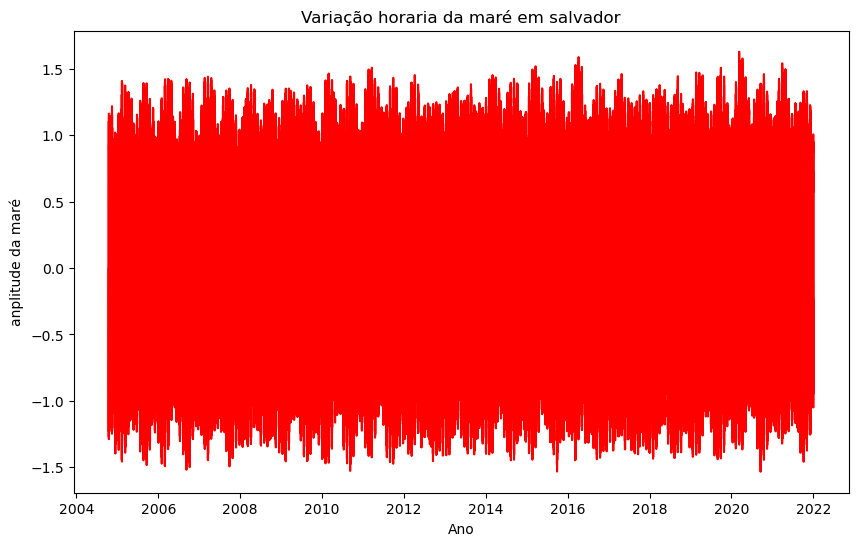

In [40]:
import matplotlib.pyplot as plt
#visualização dos dados com grafico de linhas
# Cria um gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(data['data_hora'], data['alt_zero'], 'r', label='Alturas de Maré')
plt.title("Variação horaria da maré em salvador")
plt.xlabel("Ano")
plt.ylabel("anplitude da maré")
plt.show()


In [41]:
# Converter a coluna 'data_hora' para o índice do DataFrame, se ainda não estiver
data.set_index('data_hora', inplace=True)

# Calcular a média mensal da coluna 'alt_zero' corresponde a altura após a subtração da 
media_mensal = data['alt_zero'].resample('M').mean()

# Exibir a média mensal
print(media_mensal)

data_hora
2004-10-31   -0.058666
2004-11-30   -0.043808
2004-12-31   -0.077739
2005-01-31   -0.031168
2005-02-28   -0.043050
                ...   
2021-08-31   -0.015711
2021-09-30   -0.036164
2021-10-31   -0.005526
2021-11-30    0.034195
2021-12-31    0.004507
Freq: M, Name: alt_zero, Length: 207, dtype: float64


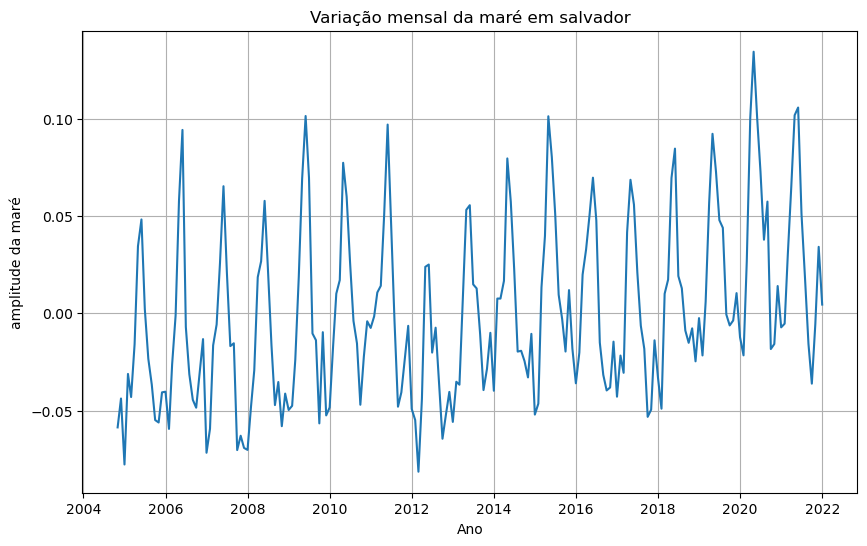

In [42]:
#plotar as médias diárias

# Cria um gráfico de linha
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(media_mensal)
plt.title("Variação mensal da maré em salvador")
plt.xlabel("Ano")
plt.ylabel("amplitude da maré")
plt.grid(True)
plt.show()

In [43]:
# Cria um novo DataFrame com as médias mensais de'data_hora' e alt_zero

df = pd.DataFrame({
    'data_hora': media_mensal.index,
    'alt_zero': media_mensal.values
})

# Exibe o novo DataFrame com as médias mensais
print(df)

     data_hora  alt_zero
0   2004-10-31 -0.058666
1   2004-11-30 -0.043808
2   2004-12-31 -0.077739
3   2005-01-31 -0.031168
4   2005-02-28 -0.043050
..         ...       ...
202 2021-08-31 -0.015711
203 2021-09-30 -0.036164
204 2021-10-31 -0.005526
205 2021-11-30  0.034195
206 2021-12-31  0.004507

[207 rows x 2 columns]


In [44]:
# Converter a coluna 'dt_hr' para o formato datetime
df['data_hora'] = pd.to_datetime(df['data_hora'])

In [45]:
# Construindo a matriz A0 para regressão linear
A0 = np.column_stack([np.ones(len(df)), df['data_hora'].apply(lambda x: x.to_julian_date())])
x0 = np.linalg.lstsq(A0, df['alt_zero'], rcond=None)[0]
alt_est = A0.dot(x0) #tendencia estimada

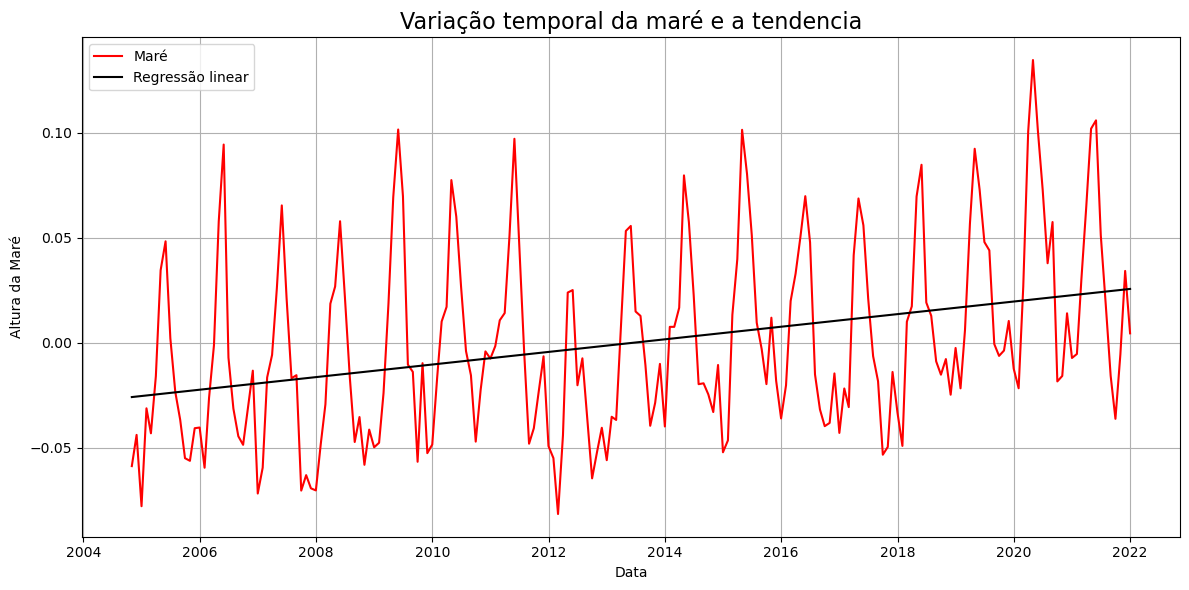

In [46]:
# Plotagem do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['data_hora'], df['alt_zero'], 'r', label='Maré')
plt.plot(df['data_hora'], alt_est, 'k', label='Regressão linear')

plt.title('Variação temporal da maré e a tendencia', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Data')
plt.ylabel('Altura da Maré')
plt.grid(True)

plt.tight_layout()

In [47]:
#formata datas em numérico representando os anos e meses em um formato decimal.
df['tempo_dec'] = df['data_hora'].dt.year + (df['data_hora'].dt.month - 1) / 12

In [48]:
# Regressão Linear
A1 = np.column_stack([np.ones(len(df)), df['tempo_dec']])
x1 = np.linalg.lstsq(A1, df['alt_zero'], rcond=None)[0]
alt1 = A1.dot(x1)

In [49]:
# Regressão Quadrática
A2 = np.column_stack([np.ones(len(df)), df['tempo_dec'], df['tempo_dec']**2])
x2 = np.linalg.lstsq(A2, df['alt_zero'], rcond=None)[0]
alt2 = A2.dot(x2)

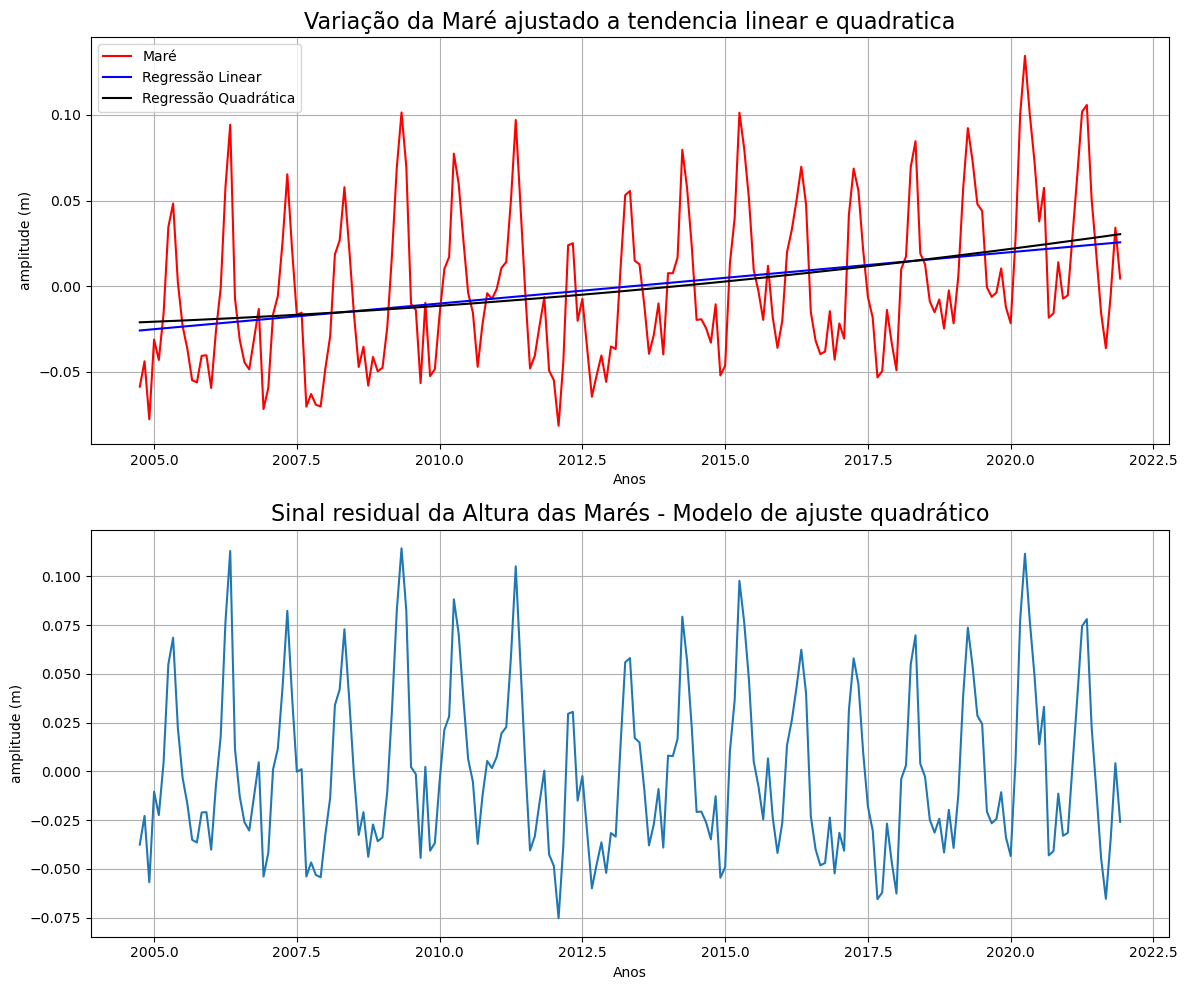

In [50]:
# Plotagem dos gráficos
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(df['tempo_dec'], df['alt_zero'], 'r', label='Maré')
plt.title('Variação da Maré ajustado a tendencia linear e quadratica', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)
plt.plot(df['tempo_dec'], alt1, 'b', label='Regressão Linear')
plt.plot(df['tempo_dec'], alt2, 'k', label='Regressão Quadrática')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df['tempo_dec'], df['alt_zero'] - alt2)
plt.title('Sinal residual da Altura das Marés - Modelo de ajuste quadrático', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [51]:
# Construindo a matriz A3 para regressão linear
A3 = np.column_stack([np.ones(len(df['tempo_dec'])), df['tempo_dec']])
x3 = np.linalg.lstsq(A3, df['alt_zero'], rcond=None)[0]
alt3 = A3.dot(x3)

In [52]:
#sinal das marés sem tendencia linear.
alt_sem_tend = df['alt_zero'] - alt3

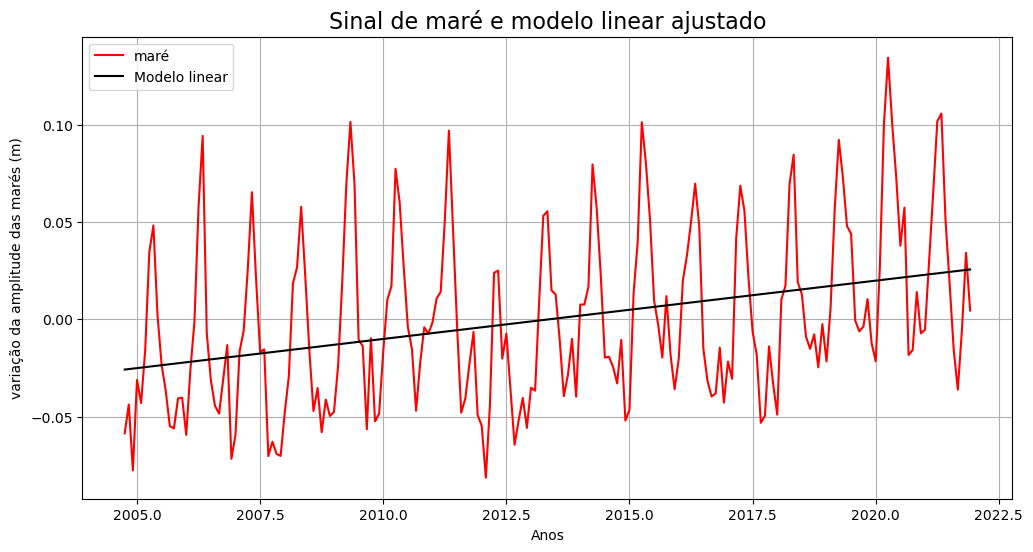

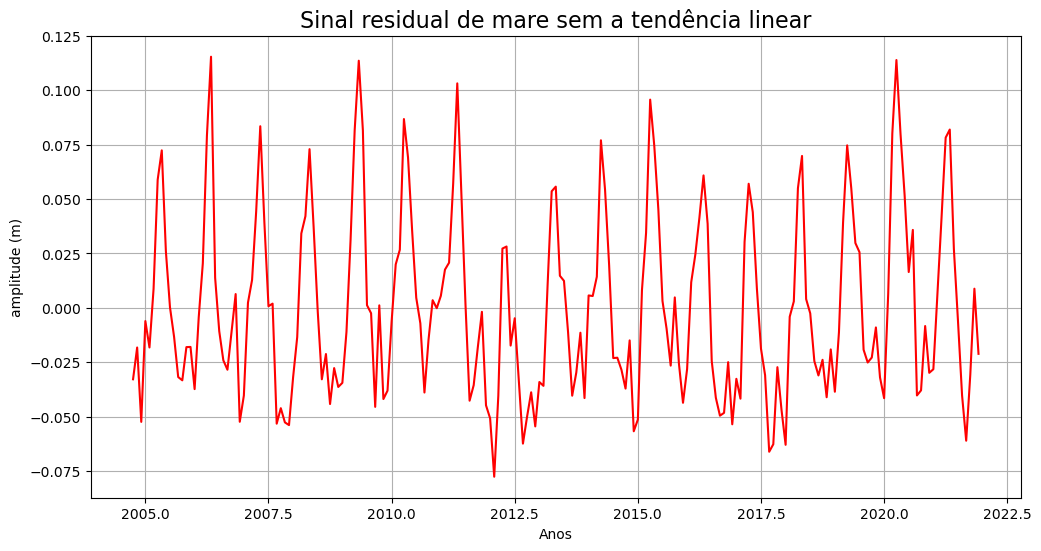

In [53]:
#Gráfico com as curvas de maré e modelo linear ajustado superpostas em cores diferentes.
plt.figure(figsize=(12, 6))
plt.plot(df['tempo_dec'], df['alt_zero'], 'r', label='maré')
plt.plot(df['tempo_dec'], alt3, 'k', label='Modelo linear')
plt.title('Sinal de maré e modelo linear ajustado', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('variação da amplitude das marés (m)')
plt.grid(True)
plt.show()

# Gráfico da série de maré sem a tendência linear (residuo).
plt.figure(figsize=(12, 6))
plt.plot(df['tempo_dec'], alt_sem_tend, 'r')
plt.title('Sinal residual de mare sem a tendência linear', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.grid(True)
plt.show()


In [54]:
# Construindo a matriz para regressão quadrática
A4 = np.column_stack([np.ones(len(df['tempo_dec'])), df['tempo_dec'], df['tempo_dec'] ** 2])
x4 = np.linalg.lstsq(A4, df['alt_zero'], rcond=None)[0]
mare_mod1 = A4.dot(x4)

In [55]:
# Calculando a série residual, alt_sem_tend2 sem tendencia quadrática (mare_mod1)
alt_sem_tend2 = df['alt_zero'] - mare_mod1

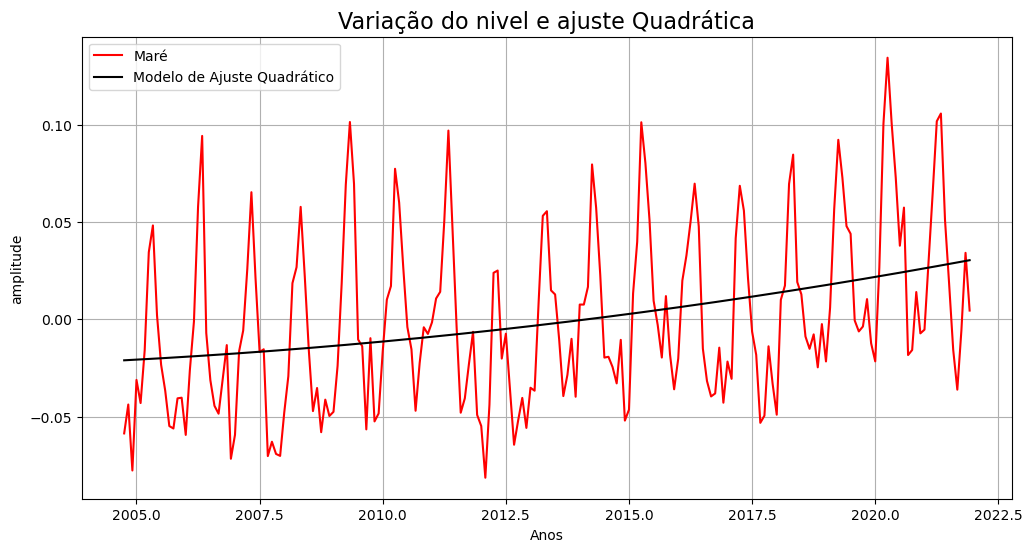

In [56]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de linhas para a variação do nível do mar em vermelho ('r')
plt.plot(df['tempo_dec'], df['alt_zero'], 'r', label='Maré')

# Gráfico de linhas para o modelo quadrático ajustado (mare_mod1) em preto ('k')
plt.plot(df['tempo_dec'], mare_mod1, 'k', label='Modelo de Ajuste Quadrático')

# Configuração do título e legendas
plt.title('Variação do nivel e ajuste Quadrática', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('amplitude')
plt.legend()
plt.grid(True)

# Exibição do gráfico
plt.show()

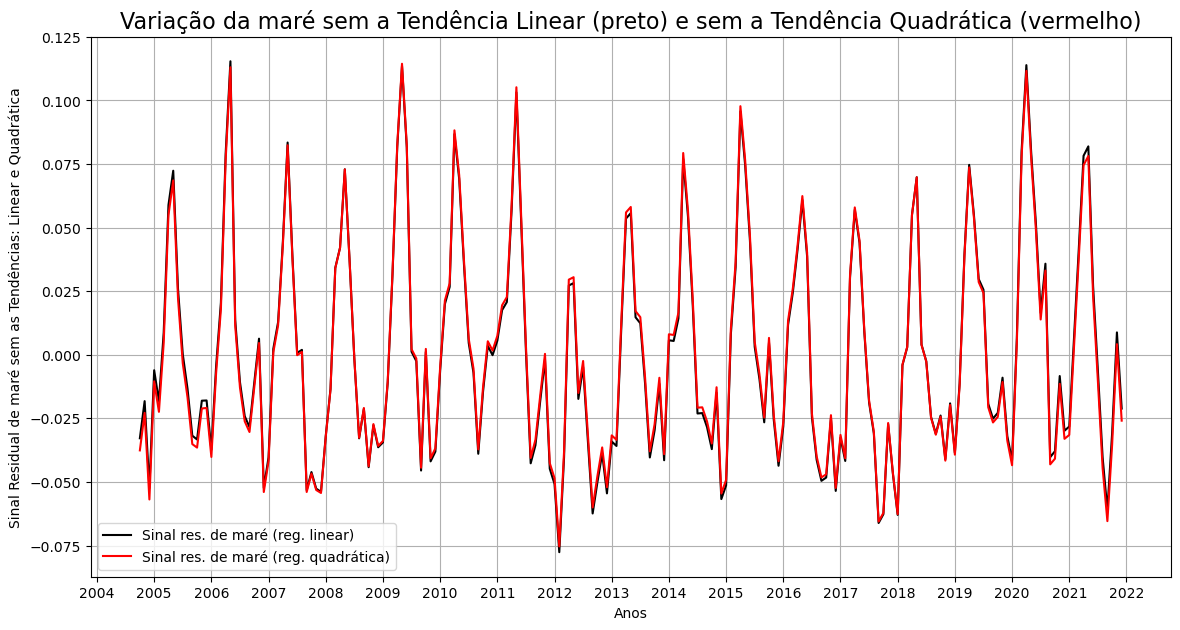

In [57]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Gráfico de linhas para alt_sem_tend em preto ('k')
plt.plot(df['tempo_dec'], alt_sem_tend, 'k', label='Sinal res. de maré (reg. linear)')

# Gráfico de linhas para alt_sem_tend2 em vermelho ('r')
plt.plot(df['tempo_dec'], alt_sem_tend2, 'r', label='Sinal res. de maré (reg. quadrática)')

# Configurações do título e legendas
plt.title('Variação da maré sem a Tendência Linear (preto) e sem a Tendência Quadrática (vermelho)', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('Sinal Residual de maré sem as Tendências: Linear e Quadrática')
plt.xticks(range(2004, 2023))
plt.legend()
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()


In [58]:
# Construindo a matriz A5 para regressão linear
A5 = np.column_stack([
    np.ones(len(df['tempo_dec'])),
    np.sin(2 * np.pi * df['tempo_dec']),
    np.cos(2 * np.pi * df['tempo_dec']),
    np.sin(4 * np.pi * df['tempo_dec']),
    np.cos(4 * np.pi * df['tempo_dec'])
])

# Realizando a regressão linear para encontrar os coeficientes x5
x5 = np.linalg.lstsq(A5, alt_sem_tend2, rcond=None)[0]

# Calculando a série prevista a partir da multiplicação de A5 por x5
mare_mod2 = A5.dot(x5)

# Calculando a série residual
alt_sem_tend3 = df['alt_zero'] - mare_mod2

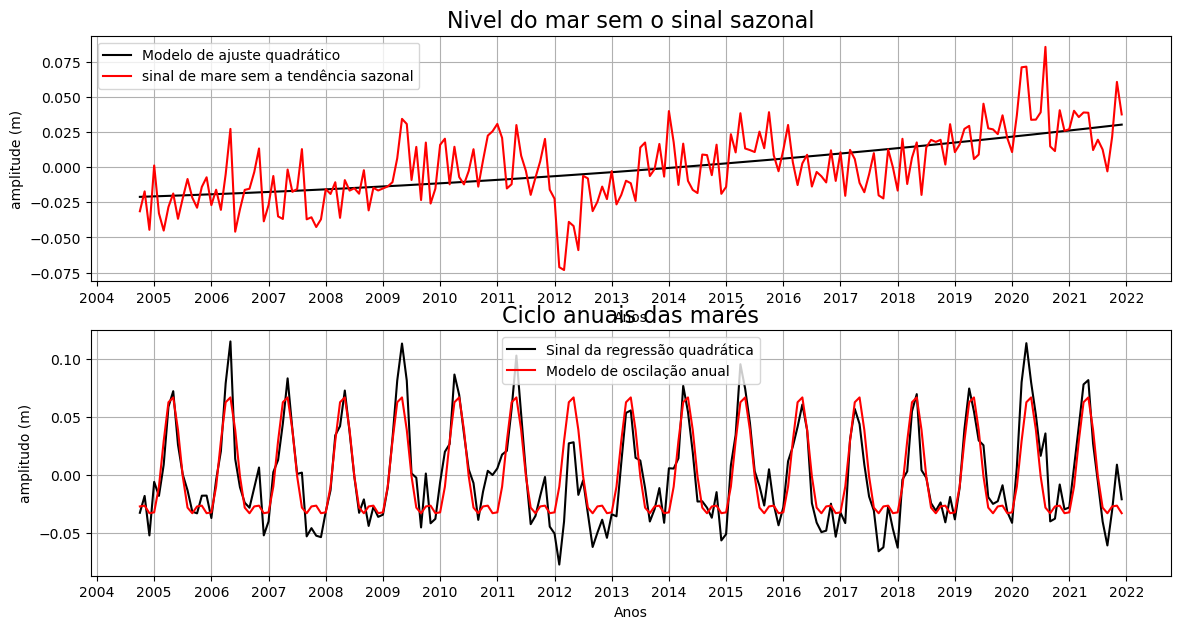

In [59]:
# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Subplot 1
plt.subplot(2, 1, 1)
plt.plot(df['tempo_dec'], mare_mod1, 'k', label='Modelo de ajuste quadrático')
plt.plot(df['tempo_dec'], alt_sem_tend3, 'r', label='sinal de mare sem a tendência sazonal')
plt.title('Nivel do mar sem o sinal sazonal', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('amplitude (m)')
plt.xticks(range(2004, 2023))
plt.box(on=True)
plt.grid(True)

# Subplot 2
plt.subplot(2, 1, 2)
plt.plot(df['tempo_dec'], alt_sem_tend, 'k', label='Sinal da regressão quadrática')
plt.plot(df['tempo_dec'], mare_mod2, 'r', label='Modelo de oscilação anual')
plt.title('Ciclo anuais das marés', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('amplitudo (m)')
plt.xticks(range(2004, 2023))
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()

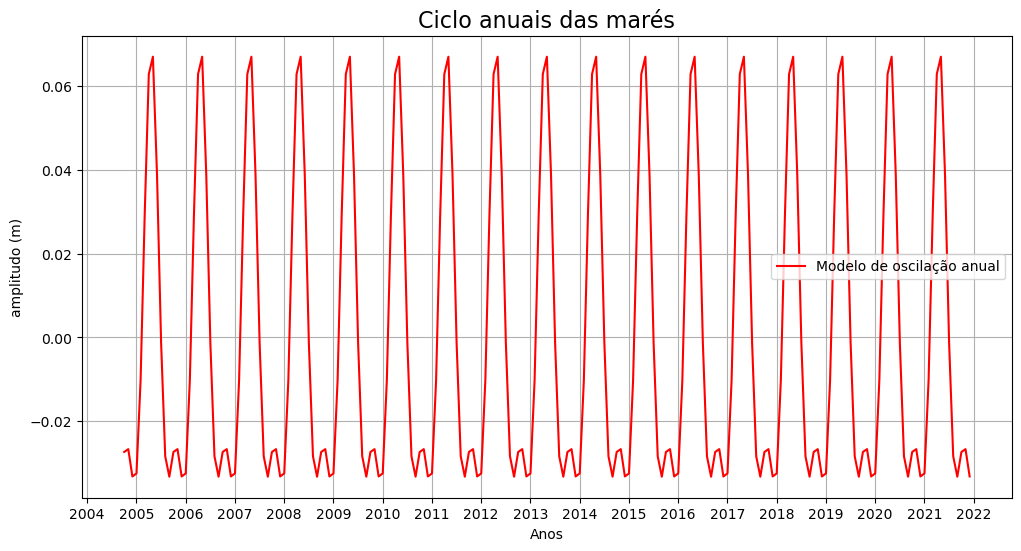

In [60]:
plt.figure(figsize=(12, 6))
plt.plot(df['tempo_dec'], mare_mod2, 'r', label='Modelo de oscilação anual')
plt.title('Ciclo anuais das marés', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Anos')
plt.ylabel('amplitudo (m)')
plt.xticks(range(2004, 2023))
plt.box(on=True)
plt.grid(True)
# Exibição do gráfico
plt.show()

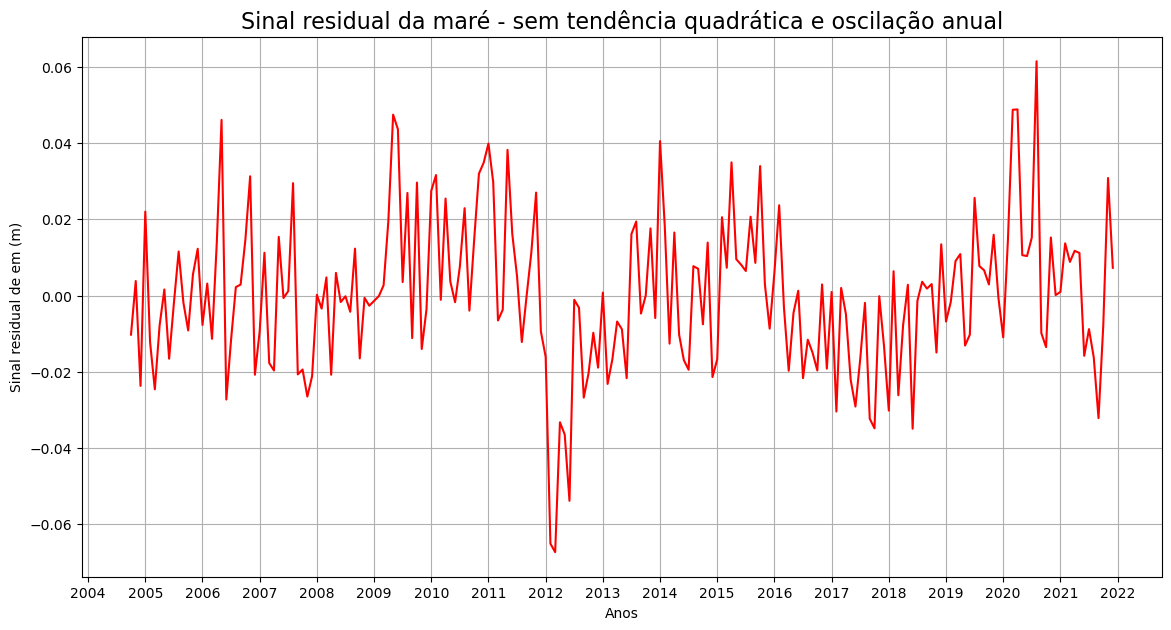

In [61]:
# Cálculo do sinal residual da maré
alt_sem_tem4 = df['alt_zero'] - mare_mod1 - mare_mod2

# Configuração do gráfico
plt.figure(figsize=(12, 6))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)  # Ajuste das margens

# Plot do sinal residual da maré
plt.plot(df['tempo_dec'], alt_sem_tem4, 'r')
plt.title('Sinal residual da maré - sem tendência quadrática e oscilação anual', fontsize=16)
plt.xlabel('Anos')
plt.ylabel('Sinal residual de em (m)')
plt.xticks(range(2004, 2023))
plt.box(on=True)
plt.grid(True)

# Exibição do gráfico
plt.show()